# Plan for MI to beat DC in Qualifier 1

Data Analytics is about finding insights and answering the questions based on historic data. It is used in almost every field today and is very helpful in making data-driven decisions.

Sport analytics in one the hot field where these skills are used to understand strength, and weakness of a team or a player and use data-driven strategies to tackle them and IPL is one of them.

Cricket is in our heart (specially Indians) and being a data analytics enthusiast and an intern at Widhya, in this document, I will try to find interesting insights from the data and make some conclusions based on them.

Let’s assume, **I am the Chief Analyst for Mumbai Indians (MI) and have a task to come up with a solid plan for MI to beat Delhi Capitals (DC) in qualifier 1.**
I will try to answer following questions based on previous seasons IPL data.
1.	What should MI choose after winning the toss?
2.	What will be a good score for MI to defend or chase?
3.	Key players of Mumbai Indians
4.	Troublemakers for Mumbai Indians
5.	How to target DC batsmen?
6.	MI vs DC Key Player Matchup

For the analysis I used IPL dataset from Kaggle and Jupyter Notebook to process it. I used python libraries like NumPy, Pandas, Matplotlib, and Seaborn. Key skills used,
- Exploratory Data Analysis
- Data Visualizations
- Domain Knowledge
- Knowledge of unsupervised machine learning algorithm


Link of the dataset: Indian Premier League 2008-2019

### Content

1. Importing Libraries
2. Loading Dataset
3. Clustering Venues
4. Answering questions

# Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

# Loading Datasets

The dataset was having some consistency issues in team name, and venue names. These issues were resolved using python and the updated dataets are loaded.

In [2]:
matches = pd.read_csv("C:/Users/User/Jupyter Notebools/Widhya Premier League (WPL)/Updated Dataset/matchesCln.csv")
deliveries = pd.read_csv("C:/Users/User/Jupyter Notebools/Widhya Premier League (WPL)/Updated Dataset/deliveriesCln.csv")

#### Columns

In [3]:
matches.columns

Index(['id', 'season', 'city', 'date', 'is_playoff', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1',
       'umpire2', 'umpire3'],
      dtype='object')

In [4]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Clustering Venues

Since venues (stadiums) can be segemented into different types like, batting pitch - high scoring grounds, bowling pitch - low scoring grounds, or an average scoring ground.

This season IPL is played is outside India and only some matches were played in IPL history at those venues. Therfore, it will be good to cluster venues, this will help in analysing performance of a team or a player on similar grounds and provide better insights.
### Approach: Clustering venues on the basis of Total runs scored, wickets down and number of boundries in a match

I am going to use Tableau software to do cluster as it will save lot time for me. I am using three parameter to cluster venues:
1. **totRuns**: Total runs scored in a match (combined score of both teams)
2. **totWickets**: Total dismissals in the match (combined dismissals of both teams)
3. **totBoundries**: Total boundries (4's and 6's) hit in the match (combined boundries for both team)

In [5]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
deliveries["is_boundry"] = deliveries["batsman_runs"].apply(lambda x: 1 if x in [4,6] else np.nan)
match_details = deliveries.groupby("match_id").agg({"total_runs":"sum","player_dismissed":"count","is_boundry":"sum"}).reset_index()

venue_details = pd.merge(matches,match_details,left_on="id",right_on="match_id")
venue_details = venue_details[venue_details["result"] == "normal"]
venue_details.shape

(743, 23)

In [7]:
venue = venue_details.groupby("venue").agg({"id":"count","total_runs":"sum","player_dismissed":"sum","is_boundry":"sum"})
venue["total_runs"] = venue["total_runs"] / venue["id"]
venue["player_dismissed"] = venue["player_dismissed"] / venue["id"]
venue["is_boundry"] = venue["is_boundry"] / venue["id"]
venue.columns = ["id","totRuns","totWickets","totBoundries"]
venue.reset_index(inplace=True)
venue.drop(columns="id",axis=1,inplace=True)
venue.to_csv("C:/Users/User/Jupyter Notebools/Widhya Premier League (WPL)/venue_data_for_clusters.csv",index=False)

In [8]:
#venue clusters formed using tableau and imported
venue_clusters = pd.read_csv("C:/Users/User/Jupyter Notebools/Widhya Premier League (WPL)/venue_clusters.csv")

venue_clusters

,venue,Clusters (2),totBoundries,totRuns,totWickets
0,ACA-VDCA Stadium,Cluster 1,34.3,290.7,12.4
1,Barabati Stadium,Cluster 2,40.4,325.4,11.4
2,Brabourne Stadium,Cluster 2,43.2,349.3,11.5
3,Buffalo Park,Cluster 3,27.7,266.3,12.7
4,De Beers Diamond Oval,Cluster 3,32.0,299.0,13.0
5,Dr DY Patil Sports Academy,Cluster 3,33.1,282.9,12.7
6,Dubai International Cricket Stadium,Cluster 1,32.1,294.9,11.3
7,Eden Gardens,Cluster 2,39.5,309.8,11.4
8,Feroz Shah Kotla Ground,Cluster 2,39.0,315.3,11.8
9,Green Park,Cluster 2,46.8,324.5,12.3


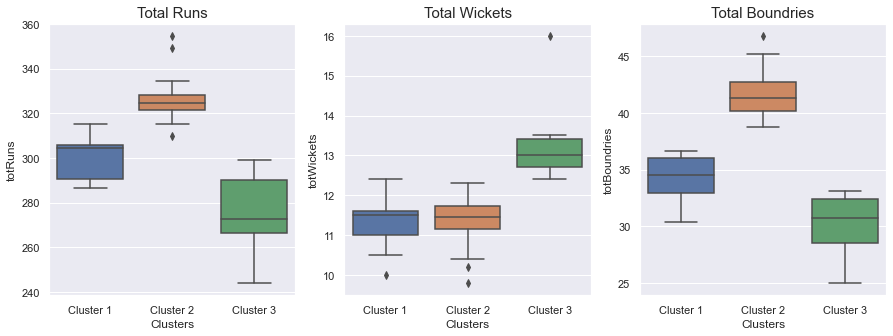

In [9]:
venue_clusters.rename(columns={"Clusters (2)":"Clusters"},inplace=True)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=venue_clusters,x="Clusters",y="totRuns")
plt.title("Total Runs",size=15)

plt.subplot(1,3,2)
sns.boxplot(data=venue_clusters,x="Clusters",y="totWickets")
plt.title("Total Wickets",size=15)

plt.subplot(1,3,3)
sns.boxplot(data=venue_clusters,x="Clusters",y="totBoundries")
plt.title("Total Boundries",size=15)

plt.show()

### Observations:

**Cluster 1:**
1. Average scoring pitch (305 runs in a match) with maximum of 315 runs
2. 11 - 12 wickets in a match
3. Approx 37 boundries in a match (max 37)

**Cluster 2:**
1. High scoring pitch (325 runs in a match) with maximum of 350+ runs
2. 11 - 12 wickets in a match
3. Approx 42 boundries in a match (max 46+)

**Cluster 3:**
1. Low scoring pitch (275 runs in a match) with maximum of 300 runs
2. 13 wickets in a match (max 16)
3. Approx 31 boundries in a match (max 34)


### Insights
1. Cluster 3 stadiums are low scoring grounds with high number of wickets i.e. bolwing pitch
2. Clust 1 stadiums are average scoring grouns, favourable for batting and bolwing both.
3. Cluster 2 stadiums are high scoring grounds and less bowling pitch i.e. batting pitch

In [10]:
venue_clusters.head()

,venue,Clusters,totBoundries,totRuns,totWickets
0,ACA-VDCA Stadium,Cluster 1,34.3,290.7,12.4
1,Barabati Stadium,Cluster 2,40.4,325.4,11.4
2,Brabourne Stadium,Cluster 2,43.2,349.3,11.5
3,Buffalo Park,Cluster 3,27.7,266.3,12.7
4,De Beers Diamond Oval,Cluster 3,32.0,299.0,13.0


In [11]:
venue_clusters['Clusters'].replace(to_replace=["Cluster 1","Cluster 2","Cluster 3"],value=["Medium","High","Low"],inplace=True)
venue_clusters.head()

,venue,Clusters,totBoundries,totRuns,totWickets
0,ACA-VDCA Stadium,Medium,34.3,290.7,12.4
1,Barabati Stadium,High,40.4,325.4,11.4
2,Brabourne Stadium,High,43.2,349.3,11.5
3,Buffalo Park,Low,27.7,266.3,12.7
4,De Beers Diamond Oval,Low,32.0,299.0,13.0


In [12]:
#checking venue cluster for current IPL season venues
venue_clusters[venue_clusters['venue'].isin(["Dubai International Cricket Stadium",'Sharjah Cricket Stadium', \
                                             'Sheikh Zayed Stadium'])]

,venue,Clusters,totBoundries,totRuns,totWickets
6,Dubai International Cricket Stadium,Medium,32.1,294.9,11.3
28,Sharjah Cricket Stadium,Medium,34.5,304.8,10.5
29,Sheikh Zayed Stadium,Low,28.8,267.8,13.5


---
## 1.	What should MI choose after winning the toss?

In [13]:
matches = matches.merge(venue_clusters[["venue","Clusters"]],on="venue")

In [14]:
def bat_first_second(data):
    
    df=data.copy()
    
    for ids in df.id.unique():
        if df[df["id"]==ids]["toss_decision"].values[0] == "field":
            df.loc[df["id"]==ids, "bat_2nd"] = df[df["id"]==ids]["toss_winner"].values[0]
            if df[df["id"]==ids]["toss_winner"].values[0] == df[df["id"]==ids]["team1"].values[0]:
                df.loc[df["id"]==ids, "bat_1st"] = df[df["id"]==ids]["team2"].values[0]
            else:
                df.loc[df["id"]==ids, "bat_1st"] = df[df["id"]==ids]["team1"].values[0]
        
        if df[df["id"]==ids]["toss_decision"].values[0] == "bat":
            df.loc[df["id"]==ids, "bat_1st"] = df[df["id"]==ids]["toss_winner"].values[0]
            if df[df["id"]==ids]["toss_winner"].values[0] == df[df["id"]==ids]["team1"].values[0]:
                df.loc[df["id"]==ids, "bat_2nd"] = df[df["id"]==ids]["team2"].values[0]
            else:
                df.loc[df["id"]==ids, "bat_2nd"] = df[df["id"]==ids]["team1"].values[0]
                
    return df

In [15]:
matches = bat_first_second(matches)
matches["bat_1st_winner"] = (matches["winner"] == matches["bat_1st"]) 

In [16]:
mi_matches = matches[(matches["team1"]=="Mumbai Indians") | (matches["team2"]=="Mumbai Indians")]
mi_matches["mi_toss_winner"] = mi_matches["toss_winner"].apply(lambda x: 1 if x=="Mumbai Indians" else 0)
mi_matches["winner"] = mi_matches["winner"].apply(lambda x: "MI" if x=="Mumbai Indians" else "Other")
mi_matches["bat_1st"] = mi_matches["bat_1st"].apply(lambda x: "MI" if x=="Mumbai Indians" else "Others")

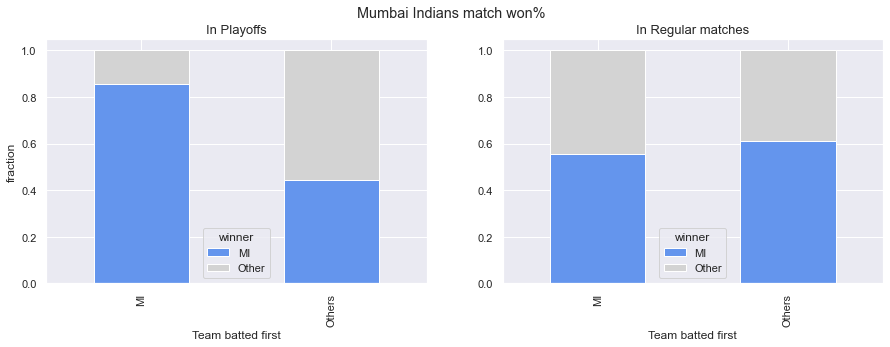

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15,4.5))

mi_matches[mi_matches["is_playoff"]==1].groupby("bat_1st")["winner"].value_counts(normalize=True).unstack()\
                                        .plot(kind="bar",stacked=True,color=["cornflowerblue","lightgray"],ax=ax[0])
ax[0].set_title("In Playoffs",size=13)
ax[0].set_xlabel("Team batted first")
ax[0].set_ylabel("fraction")

mi_matches[mi_matches["is_playoff"]==0].groupby("bat_1st")["winner"].value_counts(normalize=True).unstack()\
                                        .plot(kind="bar",stacked=True,color=["cornflowerblue","lightgray"],ax=ax[1])
ax[1].set_title("In Regular matches",size=13)
ax[1].set_xlabel("Team batted first")

plt.suptitle("Mumbai Indians match won%")
plt.show()

### Insights

There is significant difference in the winning the match when Mumbai Indians batted 1st or 2nd in playoffs vs regular season matches.

- 85% of times MI won matches while batting batting 1st in playoffs, while in regular matches it is ~60%.
- 45% of times MI won matches while batting batting 2nd in playoffs, while in regular matches it is ~60%.

*It seems like MI is good in defending the score in contrast to chasing in playoffs.*

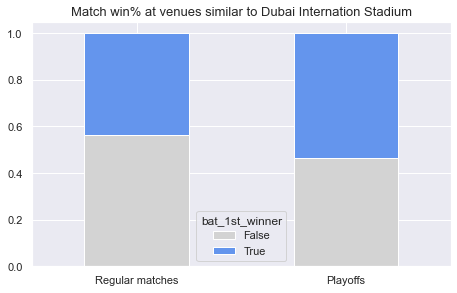

In [18]:
matches[matches["Clusters"]=="Medium"].groupby(["is_playoff","Clusters"])["bat_1st_winner"].value_counts(normalize=True).\
                                unstack().plot(kind="bar",stacked=True,color=["lightgray","cornflowerblue"],figsize=(7.5,4.5))
plt.xticks(ticks=[0,1], labels=["Regular matches","Playoffs"],rotation=0)
plt.xlabel("")

plt.title("Match win% at venues similar to Dubai Internation Stadium",size=13)
plt.show()

### Insights

At venues similar to Dubai International Stadiums, we can observe that
- 53% of times team batted 1st won the match, in playoffs
- In regular season matches, this is 44%.

*It seems that there is difference in match win% in playoffs vs regular season matches.*

---
## 2. What will be a good score to defend or chase?

Let us try to figure out what will be a good score for Mumbai Indian to defend in match againt Delhi Capitals, if they bat first.

In [19]:
#considering deliveries of non-super overs only 
runs_scord_matches = deliveries[(deliveries["is_super_over"]==0)]

#calculating scored by each team in a match
runs_scord_matches = runs_scord_matches.groupby(["match_id","inning"]).agg({"batting_team":"min","bowling_team":"min",\
                                        "total_runs":"sum","player_dismissed":"count"}).reset_index()
runs_scord_matches.head()

,match_id,inning,batting_team,bowling_team,total_runs,player_dismissed
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,4
1,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,172,10
2,2,1,Mumbai Indians,Rising Pune Supergiant,184,8
3,2,2,Rising Pune Supergiant,Mumbai Indians,187,3
4,3,1,Gujarat Lions,Kolkata Knight Riders,183,4


In [20]:
runs_scord_matches= runs_scord_matches.merge(matches[["id","is_playoff","bat_1st_winner","venue","season"]],left_on="match_id",\
                                              right_on="id")
runs_scord_matches.drop(columns=["id"],axis=1,inplace=True)
runs_scord_matches["bat_1st_winner"] = runs_scord_matches["bat_1st_winner"].replace([True,False],["Yes","No"])

runs_scord_matches = runs_scord_matches.merge(venue_clusters[["venue","Clusters"]], on="venue")
runs_scord_matches.head(2)

,match_id,inning,batting_team,bowling_team,total_runs,player_dismissed,is_playoff,bat_1st_winner,venue,season,Clusters
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,4,0,Yes,"Rajiv Gandhi International Stadium, Uppal",2017,Medium
1,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,172,10,0,Yes,"Rajiv Gandhi International Stadium, Uppal",2017,Medium


In [21]:
bat_1st_data = runs_scord_matches[runs_scord_matches["inning"]==1]

bins = [0,139,162,300]
labels = ["Less than 140", "140-162", "163 and above"]
bat_1st_data["run_bins"] = pd.cut(bat_1st_data["total_runs"], bins=bins, labels=labels)
bat_1st_data.head(2)

,match_id,inning,batting_team,bowling_team,total_runs,player_dismissed,is_playoff,bat_1st_winner,venue,season,Clusters,run_bins
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207,4,0,Yes,"Rajiv Gandhi International Stadium, Uppal",2017,Medium,163 and above
2,6,1,Gujarat Lions,Sunrisers Hyderabad,135,7,0,No,"Rajiv Gandhi International Stadium, Uppal",2017,Medium,Less than 140


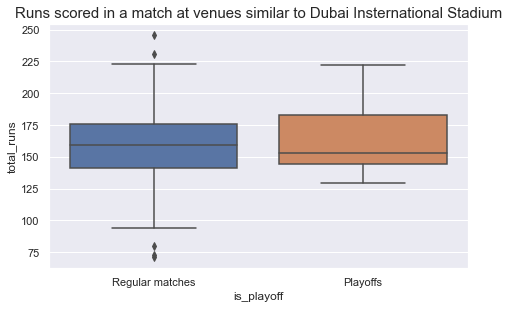

In [22]:
plt.figure(figsize=(7.5,4.5))
sns.boxplot(data=bat_1st_data[bat_1st_data["Clusters"]=="Medium"], x="is_playoff", y="total_runs",)
plt.xticks(ticks=[0,1],labels=["Regular matches","Playoffs"],rotation=0)
plt.title("Runs scored in a match at venues similar to Dubai Insternational Stadium",size=15)
plt.show()

### Observation

- Median runs scored in 1st inning at venues similar to Dubnati International Stadium is 162 runs, both in regular matches and playoffs.

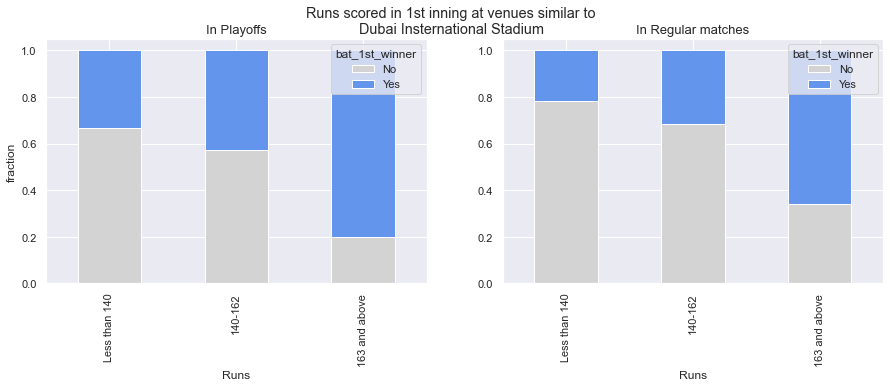

In [23]:
fig, ax = plt.subplots(1,2,figsize=(15,4.5))

bat_1st_data[(bat_1st_data["Clusters"]=="Medium") & (bat_1st_data["is_playoff"]==1)].groupby("run_bins")["bat_1st_winner"]\
            .value_counts(normalize=True).unstack().plot(kind="bar",stacked=True,color=["lightgray","cornflowerblue"],ax=ax[0])
ax[0].set_title("In Playoffs",size=13)
ax[0].set_xlabel("Runs")
ax[0].set_ylabel("fraction")

bat_1st_data[(bat_1st_data["Clusters"]=="Medium") & (bat_1st_data["is_playoff"]==0)].groupby("run_bins")["bat_1st_winner"]\
            .value_counts(normalize=True).unstack().plot(kind="bar",stacked=True,color=["lightgray","cornflowerblue"],ax=ax[1])
ax[1].set_title("In Regular matches",size=13)
ax[1].set_xlabel("Runs")

plt.suptitle("Runs scored in 1st inning at venues similar to\nDubai Insternational Stadium")
plt.show()

### Insights

- 80% of times teams were able to defend a score of 163 or more runs (median runs) in playoffs.
- Only 25% of times teams were able to defend score of less than 140 runs in playoffs.
- Stats are similar to regular season matches.


*Score of 163 or more runs will be a very good score for Mumbai Indians to defend.*

If MI scores 163 or more runs while batting first, they are most likely to win the match. However, if they score 140-162 runs then in that case they need to bowl and field very well in order to defend that score.

**Mumbai Indians batting 1st in playoffs**

In [24]:
bat_1st_data[(bat_1st_data["batting_team"]=="Mumbai Indians") & (bat_1st_data["is_playoff"]==1)]

,match_id,inning,batting_team,bowling_team,total_runs,player_dismissed,is_playoff,bat_1st_winner,venue,season,Clusters,run_bins
14,59,1,Mumbai Indians,Rising Pune Supergiant,129,8,1,Yes,"Rajiv Gandhi International Stadium, Uppal",2017,Medium,Less than 140
126,11415,1,Mumbai Indians,Chennai Super Kings,149,8,1,Yes,"Rajiv Gandhi International Stadium, Uppal",2019,Medium,140-162
505,573,1,Mumbai Indians,Chennai Super Kings,187,6,1,Yes,Wankhede Stadium,2015,High,163 and above
631,457,1,Mumbai Indians,Chennai Super Kings,148,9,1,Yes,Eden Gardens,2013,High,140-162
653,576,1,Mumbai Indians,Chennai Super Kings,202,5,1,Yes,Eden Gardens,2015,High,163 and above
1174,231,1,Mumbai Indians,Royal Challengers Bangalore,184,5,1,Yes,Dr DY Patil Sports Academy,2010,Low,163 and above
1324,515,1,Mumbai Indians,Chennai Super Kings,173,8,1,No,Brabourne Stadium,2014,High,163 and above


### Observation

We can observe that Mumbai Indian 7 times batted 1st in playoffs in the IPL history and 6 times there were able to defend score successfully.

- There were able to defend score as low as 129 runs.
- They were not able to defend a good score of 173 runs also.
- They are scoring 145+ runs everytime while batting 1st, except for one time and they were able to defend that score successfully.

*It seems that any score more than or equal to 130 runs is defendable for them.*

**Mumbai Indians batting 2nd in playoffs**

In [25]:
bat_2nd_data = runs_scord_matches[runs_scord_matches["inning"]==2]
bat_2nd_data[(bat_2nd_data["batting_team"]=="Mumbai Indians") & (bat_2nd_data["is_playoff"]==1)]

,match_id,inning,batting_team,bowling_team,total_runs,player_dismissed,is_playoff,bat_1st_winner,venue,season,Clusters
257,58,2,Mumbai Indians,Kolkata Knight Riders,111,4,1,No,M. Chinnaswamy Stadium,2017,High
313,379,2,Mumbai Indians,Chennai Super Kings,149,9,1,Yes,M. Chinnaswamy Stadium,2012,High
416,56,2,Mumbai Indians,Rising Pune Supergiant,142,9,1,Yes,Wankhede Stadium,2017,High
446,305,2,Mumbai Indians,Kolkata Knight Riders,148,6,1,No,Wankhede Stadium,2011,High
630,456,2,Mumbai Indians,Rajasthan Royals,169,6,1,No,Eden Gardens,2013,High
783,454,2,Mumbai Indians,Chennai Super Kings,144,10,1,Yes,Feroz Shah Kotla Ground,2013,High
1091,306,2,Mumbai Indians,Royal Challengers Bangalore,142,8,1,Yes,M. A. Chidambaram Stadium,2011,Medium
1161,11412,2,Mumbai Indians,Chennai Super Kings,132,4,1,No,M. A. Chidambaram Stadium,2019,Medium
1181,234,2,Mumbai Indians,Chennai Super Kings,146,9,1,Yes,Dr DY Patil Sports Academy,2010,Low


### Observations

1. MI in IPL playoffs history batted 2nd 9 times and 45% of times there were able to chase the score successfully.

2. We can observe that, while chasing MI scored less than 150 runs everytime , except one time and at that time successully chased target of 169 runs.

3. This gives us insight that while bowling 1st, MI bowlers are able to stop their opponent in less than 150 runs, and at the same time 50% of times they are able to chase the score.

*Having a target 150 runs seems to be challenging for MI. If they bat 2nd against DC in Qualifier one, they need to work on their batting and not to loose wickets at initial stage.*

---
## 3. Key players of Mumbai Indians

### Bowling Stats of MI players

In [26]:
mi_batsman = ["RG Sharma","Ishan Kishan","Q de Kock","HH Pandya","KA Pollard","SA Yadav", "SS Tiwary"]
mi_bowlers = ["TA Boult","JJ Bumrah","NM Coulter-Nile","J Yadav","RD Chahar","DS Kulkarni","KH Pandya"]

dc_batsmen = ["P Shaw","S Dhawan","AM Rahane","SS Iyer","RR Pant","MP Stoinis"]
dc_bowlers = ["K Rabada","R Ashwin","AR Patel","MP Stoinis"]

In [27]:
#merging season, venue and cluster name in deliveries dataframe
deliveries = deliveries.merge(matches[["id","season","venue"]],left_on="match_id",right_on="id").drop(columns="id")
deliveries = deliveries.merge(venue_clusters[["venue","Clusters"]],on="venue")
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_boundry,season,venue,Clusters
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2017,"Rajiv Gandhi International Stadium, Uppal",Medium
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2017,"Rajiv Gandhi International Stadium, Uppal",Medium


In [28]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_boundry,season,venue,Clusters
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2017,"Rajiv Gandhi International Stadium, Uppal",Medium
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2017,"Rajiv Gandhi International Stadium, Uppal",Medium
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1.0,2017,"Rajiv Gandhi International Stadium, Uppal",Medium
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2017,"Rajiv Gandhi International Stadium, Uppal",Medium
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,2017,"Rajiv Gandhi International Stadium, Uppal",Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11346,2,Kings XI Punjab,Chennai Super Kings,18,3,S Curran,Mandeep Singh,Imran Tahir,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2019,"Punjab Cricket Association Stadium, ...",High
179074,11346,2,Kings XI Punjab,Chennai Super Kings,18,4,S Curran,Mandeep Singh,Imran Tahir,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,NaN,2019,"Punjab Cricket Association Stadium, ...",High
179075,11346,2,Kings XI Punjab,Chennai Super Kings,18,5,Mandeep Singh,S Curran,Imran Tahir,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,NaN,2019,"Punjab Cricket Association Stadium, ...",High
179076,11346,2,Kings XI Punjab,Chennai Super Kings,17,6,Mandeep Singh,S Curran,RA Jadeja,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,NaN,2019,"Punjab Cricket Association Stadium, ...",High


In [29]:
bowling_stats_mi = deliveries[(deliveries["is_super_over"]==0) & (deliveries["bowler"].isin(mi_bowlers))]

bowling_stats_mi["legitimate_balls"] = ((bowling_stats_mi["wide_runs"] == 0) & (bowling_stats_mi["noball_runs"]==0))
bowling_stats_mi["bowler_run"] = bowling_stats_mi["wide_runs"] + bowling_stats_mi["noball_runs"] + bowling_stats_mi["batsman_runs"]

bowling_stats_mi = bowling_stats_mi.groupby(["bowler","season"]).agg({"bowler_run":"sum", "legitimate_balls":"sum", \
                                            "player_dismissed":"count"}).reset_index()

bowling_stats_mi["economy_rate"] = round((bowling_stats_mi["bowler_run"]/bowling_stats_mi["legitimate_balls"]*6),1)

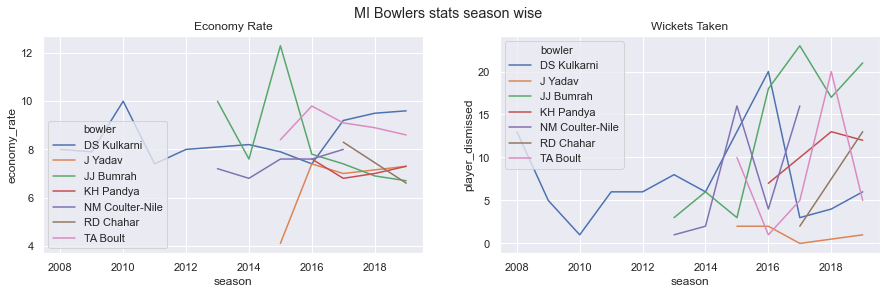

In [30]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.lineplot(data=bowling_stats_mi, x="season", y="economy_rate", hue="bowler")
plt.title("Economy Rate")

plt.subplot(1,2,2)
sns.lineplot(data=bowling_stats_mi, x="season", y="player_dismissed", hue="bowler")
plt.title("Wickets Taken")

plt.suptitle("MI Bowlers stats season wise")
plt.show()

### Batting Stats of MI players

In [31]:
batting_stats_mi = deliveries[(deliveries["is_super_over"]==0) & (deliveries["batsman"].isin(mi_batsman))]

batting_stats_mi["legitimate_balls"] = (batting_stats_mi["wide_runs"] == 0)
batting_stats_mi = batting_stats_mi.groupby(["batsman","season"]).agg({"batsman_runs":"sum", "legitimate_balls":"sum"})\
                                    .reset_index()

batting_stats_mi["strike_rate"] = round((batting_stats_mi["batsman_runs"]/batting_stats_mi["legitimate_balls"]*100),0)

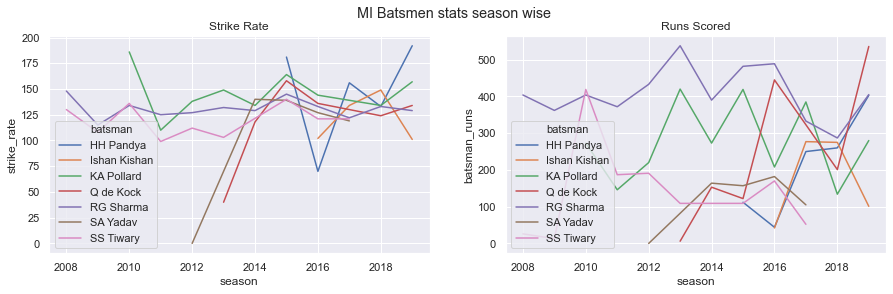

In [32]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.lineplot(data=batting_stats_mi, x="season", y="strike_rate", hue="batsman")
plt.title("Strike Rate")

plt.subplot(1,2,2)
sns.lineplot(data=batting_stats_mi, x="season", y="batsman_runs", hue="batsman")
plt.title("Runs Scored")

plt.suptitle("MI Batsmen stats season wise")
plt.show()

---
## 4. Troublemakers for Mumbai Indians

### Bowling Stats of DC players

In [33]:
bowling_stats_dc = deliveries[(deliveries["is_super_over"]==0) & (deliveries["bowler"].isin(dc_bowlers))]

bowling_stats_dc["legitimate_balls"] = ((bowling_stats_dc["wide_runs"] == 0) & (bowling_stats_dc["noball_runs"]==0))
bowling_stats_dc["bowler_run"] = bowling_stats_dc["wide_runs"] + bowling_stats_dc["noball_runs"] + bowling_stats_dc["batsman_runs"]

bowling_stats_dc = bowling_stats_dc.groupby(["bowler","season"]).agg({"bowler_run":"sum", "legitimate_balls":"sum", \
                                            "player_dismissed":"count"}).reset_index()

bowling_stats_dc["economy_rate"] = round((bowling_stats_dc["bowler_run"]/bowling_stats_dc["legitimate_balls"]*6),1)

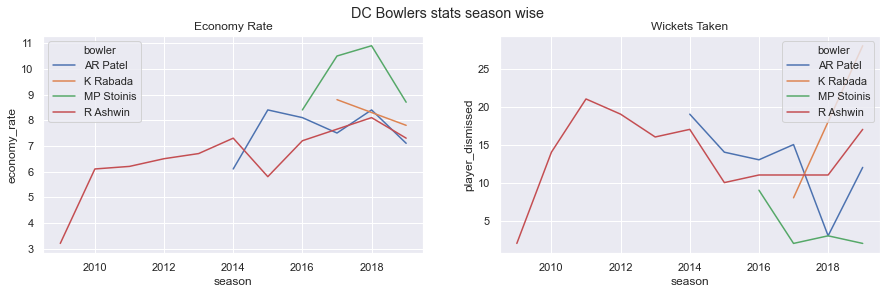

In [34]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.lineplot(data=bowling_stats_dc, x="season", y="economy_rate", hue="bowler")
plt.title("Economy Rate")

plt.subplot(1,2,2)
sns.lineplot(data=bowling_stats_dc, x="season", y="player_dismissed", hue="bowler")
plt.title("Wickets Taken")

plt.suptitle("DC Bowlers stats season wise")
plt.show()

### Batting Stats of DC players

In [35]:
batting_stats_dc = deliveries[(deliveries["is_super_over"]==0) & (deliveries["batsman"].isin(dc_batsmen))]

batting_stats_dc["legitimate_balls"] = (batting_stats_dc["wide_runs"] == 0)
batting_stats_dc = batting_stats_dc.groupby(["batsman","season"]).agg({"batsman_runs":"sum", "legitimate_balls":"sum"})\
                                    .reset_index()

batting_stats_dc["strike_rate"] = round((batting_stats_dc["batsman_runs"]/batting_stats_dc["legitimate_balls"]*100),0)

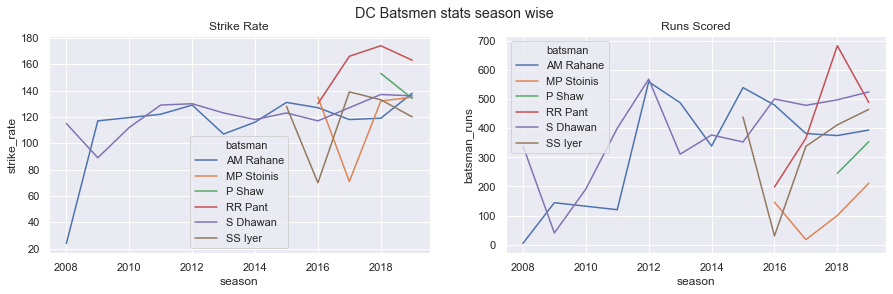

In [36]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.lineplot(data=batting_stats_dc, x="season", y="strike_rate", hue="batsman")
plt.title("Strike Rate")

plt.subplot(1,2,2)
sns.lineplot(data=batting_stats_dc, x="season", y="batsman_runs", hue="batsman")
plt.title("Runs Scored")

plt.suptitle("DC Batsmen stats season wise")
plt.show()

---
## 5.	How to target DC batsmen?

In [37]:
players_dismissed = deliveries[(deliveries["batsman"].isin(dc_batsmen))]

players_dismissed = players_dismissed.groupby(["match_id","player_dismissed"]).agg({"bowler":"min","dismissal_kind":"min"}).\
                                                        reset_index()
players_dismissed

,match_id,player_dismissed,bowler,dismissal_kind
0,1,S Dhawan,STR Binny,caught
1,2,AM Rahane,TG Southee,caught
2,4,AM Rahane,T Natarajan,caught
3,5,RR Pant,P Negi,bowled
4,6,S Dhawan,P Kumar,caught
...,...,...,...,...
394,11413,SS Iyer,K Ahmed,caught
395,11414,P Shaw,DL Chahar,lbw
396,11414,RR Pant,DL Chahar,caught
397,11414,S Dhawan,Harbhajan Singh,caught


In [38]:
dc_dismissals = players_dismissed[players_dismissed["bowler"].isin(mi_bowlers)].groupby("bowler")["player_dismissed"].\
                                            value_counts().unstack().reset_index()
dc_dismissals = dc_dismissals.fillna(0)
dc_dismissals

player_dismissed,bowler,AM Rahane,MP Stoinis,P Shaw,RR Pant,S Dhawan,SS Iyer
0,DS Kulkarni,2.0,0.0,0.0,0.0,2.0,0.0
1,JJ Bumrah,0.0,1.0,0.0,4.0,0.0,0.0
2,KH Pandya,1.0,0.0,0.0,2.0,0.0,0.0
3,NM Coulter-Nile,0.0,0.0,0.0,2.0,0.0,1.0
4,RD Chahar,1.0,0.0,1.0,0.0,1.0,1.0
5,TA Boult,1.0,0.0,0.0,0.0,0.0,0.0


----
## 6.	MI vs DC Key Player Matchup

In [39]:
match_up_data = deliveries[(deliveries["is_super_over"]==0)]


batsman = "HH Pandya"
bowler = "K Rabada"
match_up_data = match_up_data[(match_up_data["batsman"]==batsman) & (match_up_data["bowler"]==bowler)]
match_up_data["legitimate_balls"] = (match_up_data["wide_runs"]==0)
match_up_data["batsman_dismissed"] = (match_up_data["batsman"]==match_up_data["player_dismissed"])
match_up_data["dismissal_kind"] = match_up_data["dismissal_kind"].replace(np.nan,"")

match_up_data["is_boundary"] = match_up_data["batsman_runs"].apply(lambda x: 1 if x in [4,5,6] else 0)
match_up_data = match_up_data.groupby(["match_id"]).agg({"batsman_runs":"sum","is_boundary":"sum","legitimate_balls":"sum",\
                                         "batsman_dismissed":"sum","dismissal_kind":"max"}).reset_index()
match_up_data["dismissal_kind"] = match_up_data["dismissal_kind"]

In [40]:
def players_matchup_MIbatsman_DCbowler(batsman,bowler):
    
    
    match_up_data = deliveries[(deliveries["is_super_over"]==0)]
    match_up_data = match_up_data[(match_up_data["batsman"]==batsman) & (match_up_data["bowler"]==bowler)]
    
    match_up_data["legitimate_balls"] = (match_up_data["wide_runs"]==0)
    match_up_data["batsman_dismissed"] = (match_up_data["batsman"]==match_up_data["player_dismissed"])
    match_up_data["dismissal_kind"] = match_up_data["dismissal_kind"].replace(np.nan,"")
    match_up_data["is_boundary"] = match_up_data["batsman_runs"].apply(lambda x: 1 if x in [4,5,6] else 0)
    
    match_up_data = match_up_data.groupby(["match_id"]).agg({"batsman_runs":"sum","is_boundary":"sum","legitimate_balls":"sum",\
                                             "batsman_dismissed":"sum","dismissal_kind":"max"}).reset_index()

    encounters = match_up_data["match_id"].nunique()
    max_runs = match_up_data["batsman_runs"].max()
    strike_rate = round((match_up_data["batsman_runs"].sum() / match_up_data["legitimate_balls"].sum() * 100),0)
    nDismissals = match_up_data["batsman_dismissed"].sum()
    df = match_up_data[match_up_data["batsman_dismissed"]==True]["dismissal_kind"].value_counts()
    
    print("\n------------------------------------------------")
    print(f"{batsman} (MI) vs {bowler} (DC)")
    print("------------------------------------------------")
    print(f"They faced each other {encounters} time(s) before")
    print(f"Strike Rate of {batsman}: {strike_rate}")
    #print(f"Maximum runs scored in a match is {max_runs}")
    print(f"{batsman} got dimissed by {bowler} {nDismissals} times\n")
    print(df)
    print("------------------------------------------------\n")
    

In [41]:
for bat in mi_batsman:
    for ball in dc_bowlers:
        players_matchup_MIbatsman_DCbowler(bat,ball)


------------------------------------------------
RG Sharma (MI) vs K Rabada (DC)
------------------------------------------------
They faced each other 2 time(s) before
Strike Rate of RG Sharma: 120.0
RG Sharma got dimissed by K Rabada 1 times

caught    1
Name: dismissal_kind, dtype: int64
------------------------------------------------


------------------------------------------------
RG Sharma (MI) vs R Ashwin (DC)
------------------------------------------------
They faced each other 15 time(s) before
Strike Rate of RG Sharma: 83.0
RG Sharma got dimissed by R Ashwin 1 times

caught    1
Name: dismissal_kind, dtype: int64
------------------------------------------------


------------------------------------------------
RG Sharma (MI) vs AR Patel (DC)
------------------------------------------------
They faced each other 5 time(s) before
Strike Rate of RG Sharma: 75.0
RG Sharma got dimissed by AR Patel 1 times

bowled    1
Name: dismissal_kind, dtype: int64
----------------------


------------------------------------------------
SS Tiwary (MI) vs MP Stoinis (DC)
------------------------------------------------
They faced each other 0 time(s) before
Strike Rate of SS Tiwary: nan
SS Tiwary got dimissed by MP Stoinis 0 times

Series([], Name: dismissal_kind, dtype: int64)
------------------------------------------------



In [42]:
for bat in dc_batsmen:
    for ball in mi_bowlers:
        players_matchup_MIbatsman_DCbowler(bat,ball)


------------------------------------------------
P Shaw (MI) vs TA Boult (DC)
------------------------------------------------
They faced each other 0 time(s) before
Strike Rate of P Shaw: nan
P Shaw got dimissed by TA Boult 0 times

Series([], Name: dismissal_kind, dtype: int64)
------------------------------------------------


------------------------------------------------
P Shaw (MI) vs JJ Bumrah (DC)
------------------------------------------------
They faced each other 2 time(s) before
Strike Rate of P Shaw: 117.0
P Shaw got dimissed by JJ Bumrah 0 times

Series([], Name: dismissal_kind, dtype: int64)
------------------------------------------------


------------------------------------------------
P Shaw (MI) vs NM Coulter-Nile (DC)
------------------------------------------------
They faced each other 0 time(s) before
Strike Rate of P Shaw: nan
P Shaw got dimissed by NM Coulter-Nile 0 times

Series([], Name: dismissal_kind, dtype: int64)
------------------------------------

------------------------------------------------
SS Iyer (MI) vs DS Kulkarni (DC)
------------------------------------------------
They faced each other 3 time(s) before
Strike Rate of SS Iyer: 141.0
SS Iyer got dimissed by DS Kulkarni 0 times

Series([], Name: dismissal_kind, dtype: int64)
------------------------------------------------


------------------------------------------------
SS Iyer (MI) vs KH Pandya (DC)
------------------------------------------------
They faced each other 3 time(s) before
Strike Rate of SS Iyer: 100.0
SS Iyer got dimissed by KH Pandya 0 times

Series([], Name: dismissal_kind, dtype: int64)
------------------------------------------------


------------------------------------------------
RR Pant (MI) vs TA Boult (DC)
------------------------------------------------
They faced each other 0 time(s) before
Strike Rate of RR Pant: nan
RR Pant got dimissed by TA Boult 0 times

Series([], Name: dismissal_kind, dtype: int64)
----------------------------------

## End of notebook
---